In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import ami_lpsz
import fkplotlib

#fkplotlib.use_txfonts()

In [39]:
footprints = {
    "ACT (Hilton+20)"   : np.array([[0, 360], [-62, 22]]) * u.deg,
    "SPT-SZ (Bleem+15)" : np.array([np.array([22, 5.5]) * u.hourangle.to('deg'), [-40, -60]]) * u.deg,
    "SPT-ECS (Bleem+20)": np.array([np.array([24, 6]) * u.hourangle.to('deg'), [-40, -20]]) * u.deg,
}
footprints_ACT = [
    np.array([[140, 161], [-5, 6]]) * u.deg,
    np.array([[-19, -13], [-7, 6]]) * u.deg,
    np.array([[19, 48], [-11, 1]]) * u.deg,
    np.array([[-23, 54], [-10, -7]]) * u.deg,
    np.array([[-12, 18], [-52, -32]]) * u.deg,
    np.array([[102, 257], [-7, 22]]) * u.deg,
    np.array([[0, 360], [-62, 22]]) * u.deg,
    np.array([[-23, 54], [-10, -7]]) * u.deg,
     np.array([[-23, 54], [-10, -7]]) * u.deg,
]

<IPython.core.display.Javascript object>


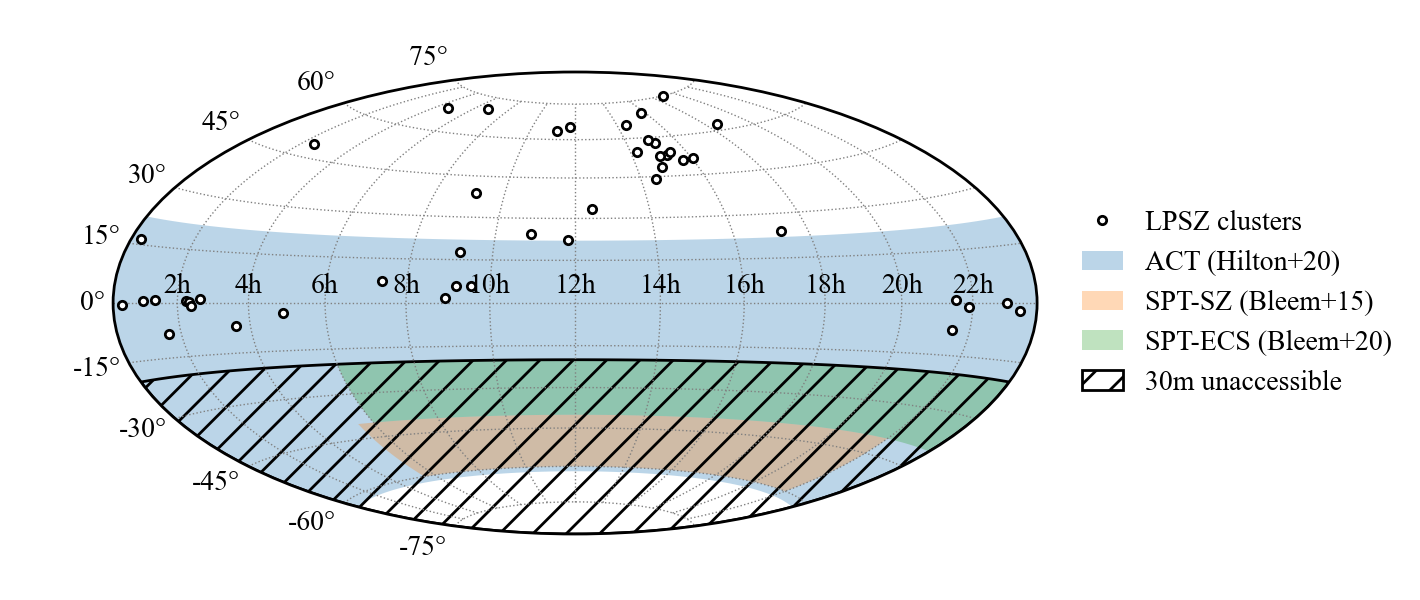

In [50]:
plt.close('all')

fig, ax = plt.subplots(subplot_kw=dict(projection="hammer"), figsize=(7.1, 3))
ax.set_xticklabels([str(i) + "h" for i in range(2, 24, 2)])
#ax.set_yticks(np.arange(-90, 91, 10) * np.pi / 180)
#ax.set_yticklabels([f"{i:.0f}\\textdegree" for i in range(-90, 91, 10)])

for name, fp in zip(footprints.keys(), footprints.values()):
    ax.fill_between(
        fp[0].to("rad").value - np.pi, *fp[1].to("rad").value, alpha=0.3, label=name
    )
ax.fill_between(
    (-np.pi, np.pi), -np.pi/2, -20 * np.pi / 180, label="30m unaccessible", hatch="//", ec="k", fc="#00000000"
)
    
#ax.axhline(-20.0 * np.pi / 180, 0, 1, label="30m limit", color="k", ls="--")
ax.grid()

cat = ami_lpsz.get_cluster_catalog()
ax.plot(cat["raSZ"] * np.pi / 180 - np.pi, cat["decSZ"] * np.pi / 180, "w.", mec="k", label="LPSZ clusters")

ax.legend(frameon=False, loc=6, bbox_to_anchor=(1.021, 0.5), handlelength=1.5)
fig.subplots_adjust(left=0.01, right=0.8)
fig.savefig("footprints.pdf")